In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np
from math import radians

In [3]:
df_geo_json = gpd.read_file('C:\\Users\\aliyu\DataspellProjects\MEC-DS-Competition\london.json')
df_train=pd.read_csv('C:\\Users\\aliyu\DataspellProjects\MEC-DS-Competition\\training_WeeklyAggregate.csv')

In [4]:
df_geo_json

,msoa_code,msoa_name,la_code,la_name,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID,DISPLAY_NAME,geometry
0,E02000508,Hillingdon 015,00AS,Hillingdon,506163,183536,505978,183811,2.746600,0,"Hillingdon, 00AS (0)","MULTIPOLYGON (((-0.47794 51.55485, -0.47665 51..."
1,E02000716,Newham 003,00BB,Newham,541978,186009,541870,185568,1.565170,1,"Newham, 00BB (1)","MULTIPOLYGON (((0.05255 51.56171, 0.05310 51.5..."
2,E02000747,Newham 034,00BB,Newham,539578,181317,539891,181438,2.082410,2,"Newham, 00BB (2)","MULTIPOLYGON (((0.01001 51.52181, 0.01003 51.5..."
3,E02000748,Newham 035,00BB,Newham,542500,181152,542439,181339,1.331750,3,"Newham, 00BB (3)","MULTIPOLYGON (((0.05392 51.51611, 0.05174 51.5..."
4,E02000749,Newham 036,00BB,Newham,541047,181103,540847,181294,1.419020,4,"Newham, 00BB (4)","MULTIPOLYGON (((0.03241 51.51704, 0.03179 51.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000974,Westminster 015,00BK,Westminster,527028,181254,527172,181179,0.689337,978,"Westminster, 00BK (978)","MULTIPOLYGON (((-0.17019 51.51994, -0.16019 51..."
979,E02000975,Westminster 016,00BK,Westminster,526396,181129,526375,181042,0.484638,979,"Westminster, 00BK (979)","MULTIPOLYGON (((-0.17867 51.52008, -0.17898 51..."
980,E02000980,Westminster 021,00BK,Westminster,529921,178656,529758,178698,0.539208,980,"Westminster, 00BK (980)","MULTIPOLYGON (((-0.12279 51.49453, -0.12305 51..."
981,E02000981,Westminster 022,00BK,Westminster,529123,178488,529140,178401,0.363777,981,"Westminster, 00BK (981)","MULTIPOLYGON (((-0.14126 51.49455, -0.14080 51..."


In [5]:
df_geo_json['longitude'] = df_geo_json.centroid.x
df_geo_json['latitude'] = df_geo_json.centroid.y

C:\Users\aliyu\AppData\Local\Temp/ipykernel_21796/1381492908.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_geo_json['longitude'] = df_geo_json.centroid.x
C:\Users\aliyu\AppData\Local\Temp/ipykernel_21796/1381492908.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_geo_json['latitude'] = df_geo_json.centroid.y


In [6]:
df_geo_json

,msoa_code,msoa_name,la_code,la_name,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID,DISPLAY_NAME,geometry,longitude,latitude
0,E02000508,Hillingdon 015,00AS,Hillingdon,506163,183536,505978,183811,2.746600,0,"Hillingdon, 00AS (0)","MULTIPOLYGON (((-0.47794 51.55485, -0.47665 51...",-0.470593,51.540762
1,E02000716,Newham 003,00BB,Newham,541978,186009,541870,185568,1.565170,1,"Newham, 00BB (1)","MULTIPOLYGON (((0.05255 51.56171, 0.05310 51.5...",0.046567,51.555122
2,E02000747,Newham 034,00BB,Newham,539578,181317,539891,181438,2.082410,2,"Newham, 00BB (2)","MULTIPOLYGON (((0.01001 51.52181, 0.01003 51.5...",0.010071,51.513538
3,E02000748,Newham 035,00BB,Newham,542500,181152,542439,181339,1.331750,3,"Newham, 00BB (3)","MULTIPOLYGON (((0.05392 51.51611, 0.05174 51.5...",0.052078,51.511347
4,E02000749,Newham 036,00BB,Newham,541047,181103,540847,181294,1.419020,4,"Newham, 00BB (4)","MULTIPOLYGON (((0.03241 51.51704, 0.03179 51.5...",0.031180,51.511230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000974,Westminster 015,00BK,Westminster,527028,181254,527172,181179,0.689337,978,"Westminster, 00BK (978)","MULTIPOLYGON (((-0.17019 51.51994, -0.16019 51...",-0.170714,51.515923
979,E02000975,Westminster 016,00BK,Westminster,526396,181129,526375,181042,0.484638,979,"Westminster, 00BK (979)","MULTIPOLYGON (((-0.17867 51.52008, -0.17898 51...",-0.179866,51.514957
980,E02000980,Westminster 021,00BK,Westminster,529921,178656,529758,178698,0.539208,980,"Westminster, 00BK (980)","MULTIPOLYGON (((-0.12279 51.49453, -0.12305 51...",-0.129992,51.491930
981,E02000981,Westminster 022,00BK,Westminster,529123,178488,529140,178401,0.363777,981,"Westminster, 00BK (981)","MULTIPOLYGON (((-0.14126 51.49455, -0.14080 51...",-0.141541,51.490604


In [7]:
df_geo_json['longitude_rad'] = [radians(_) for _ in df_geo_json['longitude']]
df_geo_json['latitude_rad'] = [radians(_) for _ in df_geo_json['latitude']]

In [8]:
df_geo_json

,msoa_code,msoa_name,la_code,la_name,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID,DISPLAY_NAME,geometry,longitude,latitude,longitude_rad,latitude_rad
0,E02000508,Hillingdon 015,00AS,Hillingdon,506163,183536,505978,183811,2.746600,0,"Hillingdon, 00AS (0)","MULTIPOLYGON (((-0.47794 51.55485, -0.47665 51...",-0.470593,51.540762,-0.008213,0.899556
1,E02000716,Newham 003,00BB,Newham,541978,186009,541870,185568,1.565170,1,"Newham, 00BB (1)","MULTIPOLYGON (((0.05255 51.56171, 0.05310 51.5...",0.046567,51.555122,0.000813,0.899807
2,E02000747,Newham 034,00BB,Newham,539578,181317,539891,181438,2.082410,2,"Newham, 00BB (2)","MULTIPOLYGON (((0.01001 51.52181, 0.01003 51.5...",0.010071,51.513538,0.000176,0.899081
3,E02000748,Newham 035,00BB,Newham,542500,181152,542439,181339,1.331750,3,"Newham, 00BB (3)","MULTIPOLYGON (((0.05392 51.51611, 0.05174 51.5...",0.052078,51.511347,0.000909,0.899043
4,E02000749,Newham 036,00BB,Newham,541047,181103,540847,181294,1.419020,4,"Newham, 00BB (4)","MULTIPOLYGON (((0.03241 51.51704, 0.03179 51.5...",0.031180,51.511230,0.000544,0.899041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000974,Westminster 015,00BK,Westminster,527028,181254,527172,181179,0.689337,978,"Westminster, 00BK (978)","MULTIPOLYGON (((-0.17019 51.51994, -0.16019 51...",-0.170714,51.515923,-0.002980,0.899122
979,E02000975,Westminster 016,00BK,Westminster,526396,181129,526375,181042,0.484638,979,"Westminster, 00BK (979)","MULTIPOLYGON (((-0.17867 51.52008, -0.17898 51...",-0.179866,51.514957,-0.003139,0.899106
980,E02000980,Westminster 021,00BK,Westminster,529921,178656,529758,178698,0.539208,980,"Westminster, 00BK (980)","MULTIPOLYGON (((-0.12279 51.49453, -0.12305 51...",-0.129992,51.491930,-0.002269,0.898704
981,E02000981,Westminster 022,00BK,Westminster,529123,178488,529140,178401,0.363777,981,"Westminster, 00BK (981)","MULTIPOLYGON (((-0.14126 51.49455, -0.14080 51...",-0.141541,51.490604,-0.002470,0.898681


In [9]:
df_extract_geo_json=df_geo_json[['geoeast', 'geonorth',  'popeast', 'popnorth','area_km2','MOVEMENT_ID', 'longitude_rad', 'latitude_rad']]

In [11]:
result=df_train.join(df_extract_geo_json, on='sourceid')

In [12]:
result

,sourceid,dstid,dow,mean_travel_time,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID,longitude_rad,latitude_rad
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,10,0.000896,0.899235
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,10,0.000896,0.899235
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,10,0.000896,0.899235
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,10,0.000896,0.899235
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,10,0.000896,0.899235
...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,657,-0.007433,0.899409
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,657,-0.007433,0.899409
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,657,-0.007433,0.899409
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,657,-0.007433,0.899409


In [13]:
result = result.rename(columns={'geoeast': 'src_geoeast', 'geonorth': 'src_geonorth', 'popeast': 'src_popeast', 'popnorth': 'src_popnorth', 'area_km2':'src_area', 'longitude_rad':'src_longitude_rad', 'latitude_rad':'src_latitude_rad'})

In [14]:
result

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,MOVEMENT_ID,src_longitude_rad,src_latitude_rad
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,10,0.000896,0.899235
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,10,0.000896,0.899235
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,10,0.000896,0.899235
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,10,0.000896,0.899235
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,10,0.000896,0.899235
...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,657,-0.007433,0.899409
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,657,-0.007433,0.899409
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,657,-0.007433,0.899409
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,657,-0.007433,0.899409


In [15]:
result.drop('MOVEMENT_ID', inplace=True, axis=1)

In [16]:
result_2=result.join(df_extract_geo_json, on='dstid')

In [17]:
result_2

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,src_longitude_rad,src_latitude_rad,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID,longitude_rad,latitude_rad
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,0.000896,0.899235,530851,174285,530876,174289,0.584104,241,-0.002063,0.898014
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,0.000896,0.899235,551347,192721,550534,191931,6.279430,612,0.003220,0.900817
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,0.000896,0.899235,535060,178641,535009,178663,0.662274,905,-0.000978,0.898681
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,0.000896,0.899235,544366,183515,544543,183531,0.796626,407,0.001395,0.899404
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,0.000896,0.899235,532416,197315,532432,197391,1.282990,603,-0.001519,0.901620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,-0.007433,0.899409,523999,180757,524025,180791,0.431376,207,-0.003744,0.899056
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,-0.007433,0.899409,529177,181229,529175,181482,1.292420,359,-0.002439,0.899110
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,-0.007433,0.899409,507078,182644,507235,182827,2.130680,656,-0.007988,0.899413
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,-0.007433,0.899409,511046,183262,511310,183074,2.057230,540,-0.006987,0.899496


In [18]:
result_2.drop('MOVEMENT_ID', inplace=True, axis=1)
result_2 = result_2.rename(columns={'geoeast': 'dst_geoeast', 'geonorth': 'dst_geonorth', 'popeast': 'dst_popeast', 'popnorth': 'dst_popnorth', 'area_km2':'dst_area', 'longitude_rad':'dst_longitude_rad', 'latitude_rad':'dst_latitude_rad'})

In [19]:
result_2

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,src_longitude_rad,src_latitude_rad,dst_geoeast,dst_geonorth,dst_popeast,dst_popnorth,dst_area,dst_longitude_rad,dst_latitude_rad
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,0.000896,0.899235,530851,174285,530876,174289,0.584104,-0.002063,0.898014
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,0.000896,0.899235,551347,192721,550534,191931,6.279430,0.003220,0.900817
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,0.000896,0.899235,535060,178641,535009,178663,0.662274,-0.000978,0.898681
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,0.000896,0.899235,544366,183515,544543,183531,0.796626,0.001395,0.899404
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,0.000896,0.899235,532416,197315,532432,197391,1.282990,-0.001519,0.901620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,-0.007433,0.899409,523999,180757,524025,180791,0.431376,-0.003744,0.899056
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,-0.007433,0.899409,529177,181229,529175,181482,1.292420,-0.002439,0.899110
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,-0.007433,0.899409,507078,182644,507235,182827,2.130680,-0.007988,0.899413
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,-0.007433,0.899409,511046,183262,511310,183074,2.057230,-0.006987,0.899496


In [20]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3956 # Radius of earth in miles. Use 6371 for kilometers
    return c * r

In [21]:
distances = []
for i in range(9830):
    distance = haversine(result_2['src_longitude_rad'][i], result_2['src_latitude_rad'][i], result_2['dst_longitude_rad'][i], result_2['dst_latitude_rad'][i])
    distances.append(distance)

In [22]:
result_2['haversine_distances'] = np.array(distances)

In [25]:
result_2['geo_distance'] = np.sqrt(((result_2['src_geoeast'] - result_2['dst_geoeast'])**2) + (result_2['src_geonorth'] - result_2['dst_geonorth'])**2)

In [26]:
result_2['pop_distance'] = np.sqrt(((result_2['src_popeast'] - result_2['dst_popeast'])**2) + (result_2['src_popnorth'] - result_2['dst_popnorth'])**2)

In [27]:
result_2

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,src_longitude_rad,...,dst_geoeast,dst_geonorth,dst_popeast,dst_popnorth,dst_area,dst_longitude_rad,dst_latitude_rad,haversine_distances,geo_distance,pop_distance
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,0.000896,...,530851,174285,530876,174289,0.584104,-0.002063,0.898014,8.744766,14114.137204,14141.759155
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,0.000896,...,551347,192721,550534,191931,6.279430,0.003220,0.900817,8.472244,13665.746851,12486.204868
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,0.000896,...,535060,178641,535009,178663,0.662274,-0.000978,0.898681,5.108887,8249.044187,8333.425766
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,0.000896,...,544366,183515,544543,183531,0.796626,0.001395,0.899404,1.397820,2258.856791,2371.941188
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,0.000896,...,532416,197315,532432,197391,1.282990,-0.001519,0.901620,11.147516,17972.040340,18017.793983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,-0.007433,...,523999,180757,524025,180791,0.431376,-0.003744,0.899056,9.186251,14838.312101,14758.276492
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,-0.007433,...,529177,181229,529175,181482,1.292420,-0.002439,0.899110,12.347505,19944.834369,19834.023142
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,-0.007433,...,507078,182644,507235,182827,2.130680,-0.007988,0.899413,1.366567,2206.109698,2155.409242
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,-0.007433,...,511046,183262,511310,183074,2.057230,-0.006987,0.899496,1.150822,1860.069891,2020.300225


In [28]:
x = result_2[['dow', 'geo_distance', 'pop_distance','src_area', 'dst_area', 'haversine_distances']]
y = result_2['mean_travel_time']

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=123)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

129445.17276826354

<AxesSubplot:ylabel='mean_travel_time'>

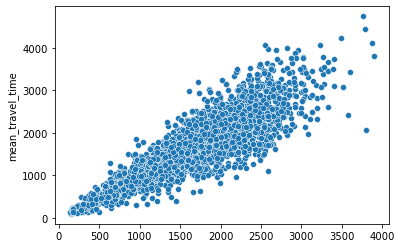

In [30]:
import seaborn as sns
sns.scatterplot(x=y_pred, y=y_test)

In [31]:

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
xgb = XGBRegressor(random_state=123)
xgb.fit(x_train, y_train)
result = xgb.predict(x_test)

mse = mean_squared_error(y_test, result)
mse

118761.05013388468

In [39]:
df_test = pd.read_csv('C:\\Users\\aliyu\DataspellProjects\MEC-DS-Competition\\testing_dataset.csv')
result_test=df_test.join(df_extract_geo_json, on='sourceid')
result_test = result_test.rename(columns={'geoeast': 'src_geoeast', 'geonorth': 'src_geonorth', 'popeast': 'src_popeast', 'popnorth': 'src_popnorth', 'area_km2':'src_area', 'longitude_rad':'src_longitude_rad', 'latitude_rad':'src_latitude_rad' })
result_test.drop('MOVEMENT_ID', inplace=True, axis=1)
result_test_2=result_test.join(df_extract_geo_json, on='dstid')
result_test_2.drop('MOVEMENT_ID', inplace=True, axis=1)
result_test_2 = result_test_2.rename(columns={'geoeast': 'dst_geoeast', 'geonorth': 'dst_geonorth', 'popeast': 'dst_popeast', 'popnorth': 'dst_popnorth', 'area_km2':'dst_area', 'longitude_rad':'dst_longitude_rad', 'latitude_rad':'dst_latitude_rad'})

result_test_2['geo_distance'] = np.sqrt(((result_test_2['src_geoeast'] - result_test_2['dst_geoeast'])**2) + (result_test_2['src_geonorth'] - result_test_2['dst_geonorth'])**2)

result_test_2['pop_distance'] = np.sqrt(((result_test_2['src_popeast'] - result_test_2['dst_popeast'])**2) + (result_test_2['src_popnorth'] - result_test_2['dst_popnorth'])**2)

distances = []
for i in range(1962):
    distance = haversine(result_test_2['src_longitude_rad'][i], result_test_2['src_latitude_rad'][i], result_test_2['dst_longitude_rad'][i], result_test_2['dst_latitude_rad'][i])
    distances.append(distance)

result_test_2['haversine_distances'] = np.array(distances)

result_test_2

,sourceid,dstid,dow,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,src_longitude_rad,src_latitude_rad,dst_geoeast,dst_geonorth,dst_popeast,dst_popnorth,dst_area,dst_longitude_rad,dst_latitude_rad,geo_distance,pop_distance,haversine_distances
0,10,950,2,542413,182380,542450,182415,0.790802,0.000896,0.899235,538948,191747,538808,191766,1.718660,0.000090,0.900719,9987.337683,10035.206276,6.196938
1,10,889,2,542413,182380,542450,182415,0.790802,0.000896,0.899235,539358,182650,539680,182755,1.271040,0.000130,0.899291,3066.908052,2790.788419,1.898084
2,260,145,2,537348,173695,537370,173721,1.159180,-0.000436,0.897895,543713,172432,543781,172406,1.292050,0.001152,0.897670,6489.098088,6544.474463,4.016861
3,260,932,7,537348,173695,537370,173721,1.159180,-0.000436,0.897895,538301,181614,538230,181583,0.751309,-0.000143,0.899133,7976.137536,7908.896510,4.950161
4,41,808,2,549480,182645,549514,183612,3.296880,0.002674,0.899245,540629,184831,540655,184780,0.589744,0.000465,0.899628,9116.951080,8935.664777,5.644133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,712,435,7,505637,189947,505240,190281,15.224400,-0.008312,0.900563,520621,184951,520571,184764,1.483440,-0.004568,0.899727,15794.944508,16293.460345,9.781657
1958,200,356,1,512165,189629,512162,189589,1.720270,-0.006669,0.900491,527883,182546,527770,182098,1.414060,-0.002756,0.899322,17240.197592,17312.560325,10.678285
1959,200,716,3,512165,189629,512162,189589,1.720270,-0.006669,0.900491,509456,187983,509559,187663,2.897740,-0.007361,0.900242,3169.857568,3238.068097,1.965162
1960,657,549,5,509284,182666,509368,182517,2.388420,-0.007433,0.899409,516339,181676,516328,181477,1.548530,-0.005664,0.899229,7124.122753,7037.272199,4.410024


In [40]:
final_df=result_test_2[['dow', 'geo_distance', 'pop_distance', 'src_area', 'dst_area', 'haversine_distances']]

In [41]:
df_keep = df_test[['sourceid','dstid', 'dow']]


y_pred = xgb.predict(final_df)
df_keep['mean_travel_time'] = y_pred
df_keep
df_keep.to_csv('submissionNumber.csv',index=False)